# Testing the `MultivariateCoupledNormal` class and entropy functions with $\kappa = 0$

Use `!pip install -i https://test.pypi.org/simple/ nsc-test` to install the latest version of `nsc-test`.

In [1]:
#!pip install -i https://test.pypi.org/simple/ nsc

# Setting up

In [2]:
import nsc
import numpy as np
from scipy.stats import multivariate_normal
from nsc.distributions import MultivariateCoupledNormal
from nsc.math.entropy import importance_sampling_integrator
from nsc.math.entropy_norm import coupled_normal_entropy, biased_coupled_probability_norm, coupled_probability_norm, coupled_cross_entropy_norm, coupled_entropy_norm, coupled_kl_divergence_norm
import matplotlib.pyplot as plt

Importing NSC lib v0.0.4.12.


In [3]:
# Set the locs.
loc = np.array([[0, 0,],
                [100, -100],
                [-10, 5]])
# Set the scales.
scale = np.array([[1, 1],
                  [10, 10],
                  [1, 1]])

# Find the number of batches.
n_batches = loc.shape[0]

# Set the kappa.
kappa = 0.0

# Initialize a MultivariateCoupledNormal object.
mvn = MultivariateCoupledNormal(loc=loc, scale=scale, kappa=kappa)

# Testing `sample_n`

In [4]:
# Set the number of samples per batched distribution.
n = 10000
# Sample n observations from each batched distribution.
samples = mvn.sample_n(n)

print(f"Expected dimensions of samples: {loc.shape[0], n, loc.shape[1]}")
print(f"Actual dimensions of samples: {samples.shape}")

Expected dimensions of samples: (3, 10000, 2)
Actual dimensions of samples: (3, 10000, 2)


In [5]:
for i in range(n_batches):
    print(f"Mean of distribution 1: {tuple(loc[i])}")
    print(f"Mean of samples from distribution 1: {tuple(samples[i].mean(axis=0))}")
    print(f"Std. Dev. of distribution 1: {tuple(scale[i])}")
    print(f"Std. Dev. of samples from distribution 1: {tuple(samples[i].std(axis=0))}")
    print("\n")

Mean of distribution 1: (0, 0)
Mean of samples from distribution 1: (0.0036859505048733327, -0.005340203215429902)
Std. Dev. of distribution 1: (1, 1)
Std. Dev. of samples from distribution 1: (1.004178893917586, 0.994984986885805)


Mean of distribution 1: (100, -100)
Mean of samples from distribution 1: (100.03427365250442, -99.94506208995922)
Std. Dev. of distribution 1: (10, 10)
Std. Dev. of samples from distribution 1: (10.002063034782571, 10.032585429088432)


Mean of distribution 1: (-10, 5)
Mean of samples from distribution 1: (-10.00142560398885, 5.006591217991517)
Std. Dev. of distribution 1: (1, 1)
Std. Dev. of samples from distribution 1: (1.0027903558833227, 1.010100150882398)




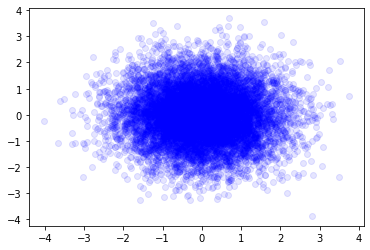

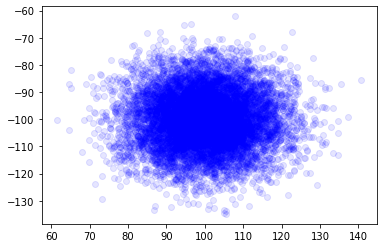

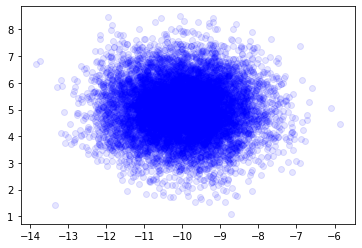

In [6]:
for i in range(samples.shape[0]):
    x, y = samples[i, :,0], samples[i, :,1]
    plt.scatter(x, y,
                color="blue", alpha=0.1)
    plt.show()

# Testing `prob` with batches (multiple distributions)

In [7]:
mvn_probs = mvn.prob(samples)

# Loop through the 
for i in range(n_batches):
    # Get the i-th distributions sample densities and reshape them to be 1-D.
    dist_1_probs = mvn_probs[i].reshape(-1,)
    # Initialize a scipy multivariate_normal object.
    mvn_scipy_1 = multivariate_normal(loc[i], scale[i]**2)
    # Get the probability densities from scipy object.
    scipy_probs_1 = mvn_scipy_1.pdf(samples[i])
    
    print(f"The densities from the Coupled MVN and SciPy MVN are close: {np.allclose(dist_1_probs, scipy_probs_1)}")
    print("\n")

The densities from the Coupled MVN and SciPy MVN are close: True


The densities from the Coupled MVN and SciPy MVN are close: True


The densities from the Coupled MVN and SciPy MVN are close: True




# `importance_sampling_integrator`

In [8]:
importance_sampling_integrator(mvn.prob, mvn.prob, mvn.sample_n, n=10000, seed=1)

C:\Users\jkcle\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[[1.]],

       [[1.]],

       [[1.]]])

# `coupled_normal_entropy`

In [9]:
#coupled_normal_entropy(mvn._sigma, kappa=0.0)

C:\Users\jkcle\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
#coupled_normal_entropy(mvn._sigma, kappa=0.003)

In [11]:
#mvn._sigma

In [12]:
#0.5 * np.log((2*np.pi*np.exp(1)) ** mvn.loc[0].shape[0] * np.linalg.det(mvn._sigma[0]))

# `biased_coupled_probability_norm`

In [13]:
new_mvn = biased_coupled_probability_norm(mvn, kappa=0.1, alpha=2)

print(new_mvn.loc)
print(new_mvn._sigma)
print(new_mvn.kappa)

[[   0    0]
 [ 100 -100]
 [ -10    5]]
[[[ 0.85714286  0.        ]
  [ 0.          0.85714286]]

 [[85.71428571  0.        ]
  [ 0.         85.71428571]]

 [[ 0.85714286  0.        ]
  [ 0.          0.85714286]]]
0.0


In [14]:
new_mvn_samples = new_mvn.sample_n(100)

# `coupled_probability_norm`

In [15]:
new_mvn_pdf = coupled_probability_norm(mvn, kappa=0.1, alpha=2.0)

np.all(new_mvn_pdf(new_mvn_samples) == new_mvn.prob(new_mvn_samples))

True

# `coupled_cross_entropy_norm`

In [16]:
coupled_cross_entropy_norm(
    mvn,
    new_mvn,
    kappa=0.0, 
    alpha=2.0, 
    root=False,
    n=10000,
    seed=1
)

C:\Users\jkcle\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[[2.85047335]],

       [[7.45423506]],

       [[2.86138521]]])

# `coupled_entropy_norm`

In [17]:
coupled_entropy_norm(
    mvn,
    kappa=0.0, 
    alpha=2.0, 
    root=False,
    n=10000,
    seed=1
)

C:\Users\jkcle\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[[2.83794589]],

       [[7.44190881]],

       [[2.84729892]]])

In [18]:
true_entropies = [
    0.5 * np.log((2*np.pi*np.exp(1)) ** mvn.loc[i].shape[0] * np.linalg.det(mvn._sigma[i])) for i in range(mvn._batch_shape[0])
]
true_entropies = np.array(true_entropies)
true_entropies.reshape(mvn._batch_shape[0], 1, 1)

C:\Users\jkcle\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[[2.83787707]],

       [[7.44304725]],

       [[2.83787707]]])

# `coupled_kl_divergence_norm`

In [19]:
coupled_kl_divergence_norm(
    mvn, 
    new_mvn, 
    kappa=0.0, 
    alpha=2.0, 
    root=False,
    n=10000,
    seed=1
)

array([[[0.01252746]],

       [[0.01232625]],

       [[0.0140863 ]]])

In [20]:
coupled_kl_divergence_norm(
    mvn, 
    mvn, 
    kappa=0.0, 
    alpha=2.0, 
    root=False,
    n=10000,
    seed=1
)

C:\Users\jkcle\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[[0.]],

       [[0.]],

       [[0.]]])

In [21]:
coupled_kl_divergence_norm(
    new_mvn, 
    new_mvn, 
    kappa=0.0, 
    alpha=2.0, 
    root=False,
    n=10000,
    seed=1
)

C:\Users\jkcle\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[[0.]],

       [[0.]],

       [[0.]]])